# Appendix 4: Python code for Single Swap Algorithm 

In [851]:
import numpy as np
import pandas as pd
import random
import copy
import matplotlib.pyplot as plt

$\textbf{Single Swap Algorithm}$

In [898]:
#Function to perform single swap algorithm
#Input: Results of Centroids, assignments and distances form the Greedy K center algorithm
#Output: New centroids, cluster assignments and distances 
def single_swap(C, C_assign, D_p):
    C_ss = copy.deepcopy(C)
    C_assign_ss = copy.deepcopy(C_assign)
    D_p_ss = copy.deepcopy(D_p)
    Dist=max(D_p_ss)
    for center_idx in range(len(C_ss)):
        for i in range(len(data)):
            C_new = np.delete(C_ss,(center_idx), axis=0)
            C_new = np.insert(C_new, center_idx, data[i], axis = 0)
            D_p_new, C_assign_new = cost_swap(C_new)
            Dist_new = max(D_p_new)
            if(Dist_new< 0.95*Dist):
                Dist = Dist_new
                C_assign_ss= C_assign_new
                D_p_ss= D_p_new
                C_ss = C_new
            else:
                C_new = C_ss
            return C_ss, C_assign_ss, D_p_ss

$\textbf{Reading the dataset}$

In [899]:
def read_data(path):
    data = pd.read_csv(path, header = None)
    data = np.asarray(data)
    return data

In [900]:
#Function to compute the norm of a vector
def norm_vec(vec):
    return np.sqrt(np.sum(vec**2))

In [901]:
#Function to compute the norm of each vector in the matrix
def norm(mat):
    return np.sqrt(np.sum(mat**2, axis = 1))

$\textbf{Function to compute the objective function value}$

In [902]:
#Function to compute the objective function value (cost function - Max the minimum distance)
def cost(C_assign_new, D_p_temp, new_center, i):
    D_p_new = np.minimum(D_p_temp, norm(data-new_center)) #Distance from the nearest center 
    C_assign_new[np.where(D_p_new<D_p_temp)] = i
    return D_p_new, C_assign_new

$\textbf{Function to swap the centroids}$

In [903]:
def cost_swap(Centroids):
    D_p_temp =[]
    C_assign_temp = []
    for i in data:
        dists=[norm_vec(i-y) for y in Centroids]
        D_p_temp.append(min(dists)) #Adding the square root euclidean distance from a point to its nearest centroid 
        C_assign_temp.append(np.argmin(dists)) #Assigning the point to its nearest centroid 
    return D_p_temp, C_assign_temp

$\textbf{Greedy K centers algorithm}$

In [904]:
def GreedyK(X, K):
    C = [list(random.choice(data))]
    C_assign = np.zeros(data.shape[0])
    D_p = np.array(norm(data-C))
    for i in range(1, K):
        c_idx = np.argmax(D_p)
        C.append((list(data[c_idx])))
        D_p_new, C_assign = cost(C_assign, D_p, C[-1], i)
        D_p = D_p_new 
    return C, C_assign, D_p

$\textbf{Plotting the clusters}$

In [905]:
#Plotting the clusters and the centroids 
#Input: X - Data Matrix, Y - Centroids, C - Cluster assignment
def plot_clusters(X, Y, C):
    Y = np.array(Y)
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=C)
    plt.plot(Y[:,0],Y[:,1], 'Xr', label = 'Centroids')
    plt.title('K Means Clustering for K = '+ str(len(Y)))
    plt.legend()
    plt.show()

In [906]:
#Reading the dataset path and the no. of clusters
path = input('Enter the path for the dataset: ')
data = read_data(path)
K = int(input('Enter the no. of clusters: '))

#Applying Greedy K centers and then Single Swap algorithm on the centers obtained 
C, C_assign, D_p = GreedyK(data, K)
print ('The cost after Greedy K centers algorithm: ', max(D_p))
C_ss, C_assign_ss, D_p_ss = single_swap(C, C_assign, D_p)
Dist_SingleSwap = max(D_p_ss)
print ('The cost after Single Swap algorithm: ', Dist_SingleSwap)
#Clearly the cost reduced after the Single swap algorithm

Enter the path for the dataset: Dataset 1/clustering.csv
Enter the no. of clusters: 2
The cost after Greedy K centers algorithm:  7.46279522191
The cost after Single Swap algorithm:  6.08116685648


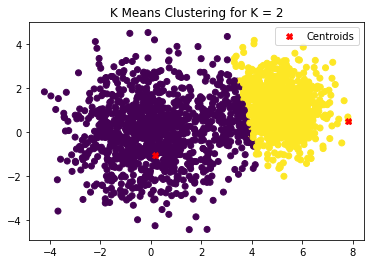

In [907]:
#Plotting the clusters obtained after the Single swap algorithm is completed
plot_clusters(data, C_ss, C_assign_ss)